In [17]:
import pandas as pd
file_path = "/content/archive (15).zip"
dataset = pd.read_csv(file_path)
print(dataset.head())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [18]:
print("dataset shape:")
print(dataset.shape)

dataset shape:
(1338, 7)


In [19]:
print("columns:")
dataset.columns

columns:


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [20]:

string_columns = ['sex', 'smoker', 'region']

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in string_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le  # Store the encoder for potential reverse transformation

print(dataset.head())
print("dataset shape:")
print(dataset.shape)
print("columns:")
dataset.columns

   age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       3  16884.92
1   18    1  33.8         1       0       2   1725.55
2   28    1  33.0         3       0       2   4449.46
3   33    1  22.7         0       0       1  21984.47
4   32    1  28.9         0       0       1   3866.86
dataset shape:
(1338, 7)
columns:


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [21]:
print("NUll Values:")
print(dataset.isnull().sum())

NUll Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [23]:
vector_example = dataset['age']

print('vector_example\n',vector_example)

factor_example = dataset['sex'].astype('category')

print('\n\nfactor_example\n',factor_example)

list_example = [vector_example, factor_example, dataset['expenses']]

print('\n\nlist_example\n',list_example)

matrix_example = dataset[['age', 'bmi']].to_numpy()

print('\n\nmatrix_example\n',matrix_example)

data_frame_example = pd.DataFrame({
    'Age': dataset['age'],
    'BMI': dataset['bmi'],
    'EXPENSES': dataset['expenses']
})

print("Data structures created:")
print(list_example)

vector_example
 0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64


factor_example
 0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: category
Categories (2, int64): [0, 1]


list_example
 [0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64, 0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: category
Categories (2, int64): [0, 1], 0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64]


matrix_example
 [[19.  27.9]
 [1

In [24]:
max_smoker = 100000
max_age = 100
dataset = dataset[(dataset['smoker'] <= max_smoker) & (dataset['age'] <= max_age)]

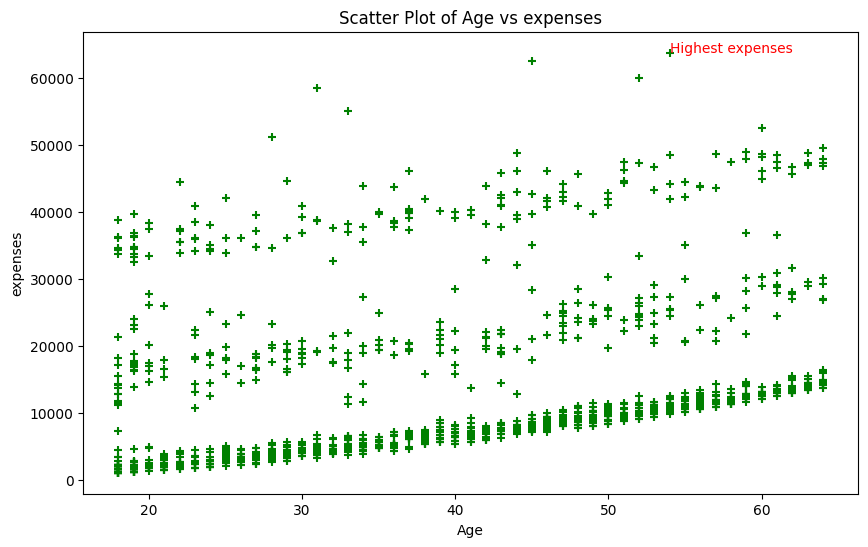

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(dataset['age'], dataset['expenses'], c='green', marker='+')
plt.title('Scatter Plot of Age vs expenses')
plt.xlabel('Age')
plt.ylabel('expenses')

if not dataset.empty:
    highest_expenses = dataset.loc[dataset['expenses'].idxmax()]
    plt.text(highest_expenses['age'], highest_expenses['expenses'], 'Highest expenses', color='red')

plt.show()


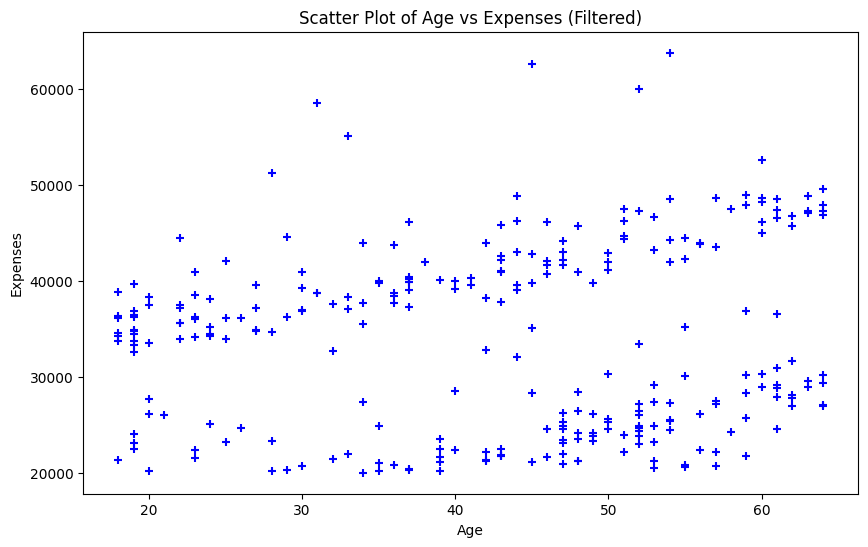

In [27]:
filtered_data = dataset[dataset['expenses'] > 20000]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['age'], filtered_data['expenses'], c='blue', marker='+')
plt.title('Scatter Plot of Age vs Expenses (Filtered)')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.show()

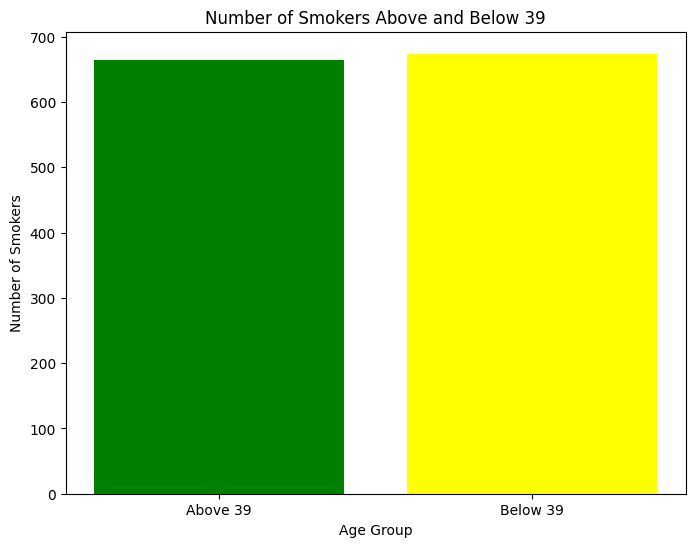

In [36]:
a = dataset[dataset['age'] > 39]['smoker'].value_counts()
b = dataset[dataset['age'] <= 39]['smoker'].value_counts()

plt.figure(figsize=(8, 6))

plt.bar(['Above 39', 'Below 39'], [a.sum(), b.sum()], color=['green', 'yellow'])

plt.xlabel("Age Group")
plt.ylabel("Number of Smokers")
plt.title("Number of Smokers Above and Below 39")

plt.show()

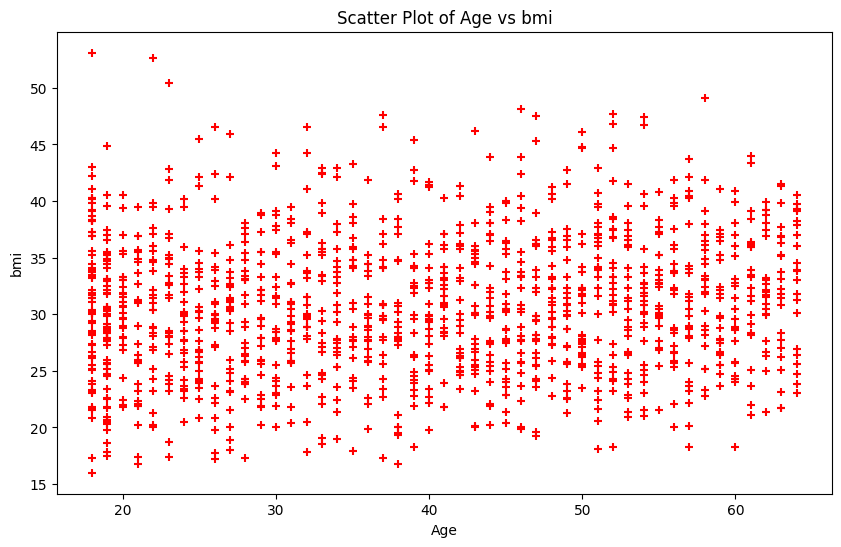

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['age'], dataset['bmi'], c='red', marker='+')
plt.title('Scatter Plot of Age vs bmi')
plt.xlabel('Age')
plt.ylabel('bmi')
plt.show()